In [18]:
from datetime import datetime
datetime.now().strftime('%Y%m%d_%H%M%S')[4:-2]  # 月日_时分 即可

'0120_0205'

# 使用现有的TM阵shuffle时空

## shuffle时空

In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import itertools
import random
import pandas as pd
import numpy as np


In [19]:
# tmData = pd.read_csv("/home/hesy/projects/genflow/lambda_data/TmDataIn15min.csv", header=None)
tmData = pd.read_csv("/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/help_data/abi/Abi-TM.txt", header=None)

tmData.shape
tmData.index
tmData.columns

# shuffle（保留空间相关性）
reRange_time = np.random.permutation( range( tmData.shape[0] ) )
reRange_time

# shuffle（保留时间相关性）
reRange_shape = np.random.permutation( range( tmData.shape[1] ) )
reRange_shape

(4000, 132)

RangeIndex(start=0, stop=4000, step=1)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            122, 123, 124, 125, 126, 127, 128, 129, 130, 131],
           dtype='int64', length=132)

array([3495, 2523, 1321, ...,  526, 2263, 1071])

array([118,  38, 102,  91,  41,   4, 125, 117,  25,  52,  66, 122, 129,
        86,  58, 108,  28,   3,  13,   9, 106, 130,  95, 111, 123,  19,
       127, 113,  55,  30,  22,  29,  85, 120,  94,  96, 101,  34,  88,
        75,  21,  53,  59,  73,  14,  87,  65,  37,  23,  84, 119, 103,
        35, 126, 131,  76,  64,  32,  71,  99,   2,  90,  50,  16, 104,
        79,  24,  78,   6,   0,  83,  69, 105,  45, 115,  70,  74,   8,
        33, 110,  11,  49,  62,   1, 109,  51,  61,  10,  93,  57,  43,
        31,  39,  15,  46, 100,  92,  56, 114,  60, 128,  42,  26,  27,
        72,  47,  48,   5,  77, 121,  89,  12,  44,  68,  17,  18,  82,
        97,  20, 124,  98, 107,  81,   7,  63,  36, 112, 116,  54,  40,
        80,  67])

In [ ]:
tmData.head()

with open("/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/help_data/abi/shuffleTime-15minTm.txt","w") as f:
    tmData_ = tmData.iloc[reRange_time,:]
    tmData_.head()
    tmData_.shape
    # tmData_.dtypes
    np.savetxt( f ,tmData_.values ,fmt='%d' )

with open("/home/hesy/projects/genflow/lambda_data/shuffleSpace-15minTm.txt","w") as f:
    tmData_ = tmData.iloc[:,reRange_shape]
    tmData_.head()
    tmData_.shape
    np.savetxt( f ,tmData_.values ,fmt='%d')

## 转换数据格式
/home/guifei/ns3_RL_LP_hesy/LP_KSP/LP_NS3_GEA_5561/DRLTE/inputs
randTM
shuffleTime
shuffleSpace

In [ ]:
/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/TM_real

### 造的数据

In [25]:
np.loadtxt("/home/hesy/projects/genflow/lambda_data/shuffleSpace-15minTm.txt",dtype=np.int).dtype

dtype('int64')

In [26]:
# GEA_randTM.txt
tm_ = pd.DataFrame(np.loadtxt("/home/hesy/projects/genflow/lambda_data/shuffleSpace-15minTm.txt",dtype=np.int))
tm__ = pd.DataFrame(np.loadtxt("/home/hesy/projects/genflow/lambda_data/shuffleTime-15minTm.txt",dtype=np.int))

tm_.head()
tm__.head()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,19634,7500,7799,310,3,258621,282,4370,2491,1102,...,132,99,7,616,22954,42,2,37,85,24
1,33294,237,363,40,1,13400,531,3525,640,3047,...,571,6,1,1,1494,272,4,15,180,83
2,110643,6383,2499,286,1177,8495,330,1550,184,79,...,1388,13,40,3336,30777,41,17,120,3657,160
3,1581,52,2157,406,15,3600,6,574,602,79,...,25,1,14,16565,1486,240,1,103,1526,136
4,7779,1377,11184,356,84,30448,129,1952,740,132,...,141,520,203,105,13598,16,320,240,422,165


,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,33,1,1601,20547,4655,55,244,280,360,288,...,160886,16362,202,2,37,1,4913,851,2,4054
1,1,1,1144,22377,2964,3034,11,636,39,246,...,63118,4654,27,1,9,1,274,21,7,3926
2,14,1,1788,12426,24952,166,33,2305,737,1493,...,171155,11072,592,2332,19,80,7,496,41,1
3,1,13,91,7819,353,87,5,162,6,6150,...,48913,5955,42,2681,68,5803,3,2586,2,1
4,35,1,723,21055,2424,99,321,160,1836,250,...,18873,5796,158,2136,1,1,73,396,1,533


In [33]:
for tmIdx in range(tm_.shape[0]):
    with open(f"/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/shuffleSpatial/tm.{tmIdx+1}","w") as f:
        # 每一行转成 23*22
        tmp = tm_.iloc[tmIdx,:].values.reshape(23,-1)
        np.savetxt(f,tmp,fmt="%d")

for tmIdx in range(tm__.shape[0]):
    with open(f"/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/shuffleTemporal/tm.{tmIdx+1}","w") as f:
        # 每一行转成 23*22
        tmp = tm__.iloc[tmIdx,:].values.reshape(23,-1)
        np.savetxt(f,tmp,fmt="%d")

### 真实数据

In [ ]:
for i in range()
tm = pd.DataFrame(np.loadtxt("/home/hesy/projects/genflow/lambda_data/TmDataIn15min.txt",dtype=np.int))
for tmIdx in range(tm_.shape[0]):
    with open(f"/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/TM_real/tm.{tmIdx+1}","w") as f:
        # 每一行转成 23*22
        tmp = tm_.iloc[tmIdx,:].values.reshape(23,-1)
        np.savetxt(f,tmp,fmt="%d")

## C端的KSP代码

### trueTM

In [56]:
# 读入数据 3231个tm
import os.path as osp
import math
parDir = "/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/TM_real"
true_data_3231 = []

## 辅助处理函数
def processTM( tmIdx ):
    tmp = np.loadtxt( osp.join(parDir,f"{tmIdx}.txt" ) )
    tmp = map(math.ceil, tmp[:,2])
    return list(tmp)
    
for tmIdx in range(3231):
    true_data_3231.append( processTM(tmIdx) )

In [57]:
# check下是否一致
true_data_3231 = pd.DataFrame( true_data_3231 )
true_data_3231.shape
true_data_3231.head()

(3231, 529)

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
0,26060,45729,13056,9340,356,1,1597,49,1546,821,...,1,204,5,8075,1683,2,1,851,161,0
1,104,68369,71010,3151,372,0,41874,67,1068,173,...,11,0,25,327,1280,2,25,21,111,0
2,547113,53671,1192,418627,441,0,1334,35,5111,17822,...,51,27,543,37949,28,15,58,496,14,0
3,17821,15383,91,206,582,0,502,79,1292,1050,...,14,54,1081,7424,0,14,1,2586,1535,0
4,8307,1826,1068,5659,684,1,2022,84,1092,207,...,0,2,338,20754,551,39,0,396,172,0


In [66]:
start =[0]
for i in range(22):
    start.append(start[-1]+23+1)

#### 生成格式

In [95]:
train_num = 2000
test_num = 500
parDir = "/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs"

for tmIdx in range(train_num): 
    with open( osp.join(parDir,"trueTM/train",f"{tmIdx}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {true_data_3231x506.iloc[tmIdx,index]}" ,file = f) 
                    index+=1

for tmIdx in range(train_num,train_num+test_num): 
    with open( osp.join(parDir,"trueTM/test",f"{tmIdx-train_num}.txt"),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {true_data_3231x506.iloc[tmIdx,index]}" ,file = f) 
                    index+=1
    

### saveSpace & saveTime (shuffle 数据生成)

In [96]:
true_data_2500x529 = true_data_3231[:2500]
true_data_2500x506 = true_data_3231x506[:2500]

#### shuffle time（保留空间相关性）- save space

In [109]:
reRange_time = np.random.permutation( range( true_data_2500x506.shape[0] ) )
saveSpace = true_data_2500x506.iloc[reRange_time,:]

train_num = 2000
test_num = 500
parDir = "/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs"

for tmIdx in range(train_num): 
    with open( osp.join(parDir,"saveSpace/train",f"{tmIdx}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {saveSpace.iloc[tmIdx,index]}" ,file = f) 
                    index+=1

for tmIdx in range(train_num,train_num+test_num): 
    with open( osp.join(parDir,"saveSpace/test",f"{tmIdx-train_num}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {saveSpace.iloc[tmIdx,index]}" ,file = f) 
                    index+=1
                    

In [114]:
saveSpace.iloc[57]

,1,2,3,4,5,6,7,8,9,10,...,518,519,520,521,522,523,524,525,526,527
57,15752,9016,3577,293,0,5098,4,629,156,967,...,23,4,27,15,101,640,27,0,0,22
2128,45817,30176,5409,519,0,51295,1527,1085,2846,221,...,618,0,94,341,3047,243,171,1906,176,143
1715,8433,74,839,428,0,17539,567,8052,339,130,...,140,1,0,0,6186,14,20,0,912,22
686,8352,23,926,635,0,232,754,6934,402,88,...,1797,4,4,19,2056,29,14,0,809,75
2021,15112,21,13497,229099,0,12307,110238,203778,0,98,...,101,2,3387,126,81,6451,15,28,147,768


In [117]:
saveSpace.iloc[2000]

1      3226
2       628
3       946
4       599
5        66
       ... 
523     265
524     229
525      12
526    4196
527     830
Name: 851, Length: 506, dtype: int64

#### shuffle space（保留时间相关性）- save time

In [110]:
reRange_time = np.random.permutation( range( true_data_2500x506.shape[1] ) )
saveTime = true_data_2500x506.iloc[:,reRange_time]

train_num = 2000
test_num = 500
parDir = "/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs"

for tmIdx in range(train_num): 
    with open( osp.join(parDir,"saveTime/train",f"{tmIdx}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {saveTime.iloc[tmIdx,index]}" ,file = f) 
                    index+=1

for tmIdx in range(train_num,train_num+test_num): 
    with open( osp.join(parDir,"saveTime/test",f"{tmIdx-train_num}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {saveTime.iloc[tmIdx,index]}" ,file = f) 
                    index+=1
                    

In [113]:
saveTime.head()

,213,154,145,199,453,410,284,469,13,171,...,155,476,502,190,339,170,172,12,483,330
0,21112,16362,191,956,6084,21,19181,924,162,1,...,1270,38247,0,127,25,101,26943,679,138,371
1,8621,4654,362,3237,9144,33,20515,950,48,101,...,313,42093,0,910,24,266,3264,15922,458,99
2,7164,11072,247,167531,2069,4,10539,3486,235,4,...,1198,26556,0,837,2,1081,29441,8995,241,2276
3,0,5955,1,461007,3103,3,613,1334,143,14,...,31,22040,0,0,1,35,7221,1444,114,398
4,6580,5796,502,119576,8739,8,4609,861,142,0,...,24,23791,0,222,0,150,8702,388,252,452


In [120]:
saveTime.iloc[2001]

213         3
154      3464
145       207
199    504945
453      1852
        ...  
170        93
172      5303
12       1490
483       186
330       260
Name: 2001, Length: 506, dtype: int64

In [ ]:
# shuffle（保留时间相关性）
reRange_shape = np.random.permutation( range( true_data_2500x506.shape[1] ) )
reRange_shape

In [ ]:
tmData.head()

with open("/home/hesy/projects/genflow/lambda_data/shuffleTime-15minTm.txt","w") as f:
    tmData_ = tmData.iloc[reRange_time,:]
    tmData_.head()
    tmData_.shape
    # tmData_.dtypes
    np.savetxt( f ,tmData_.values ,fmt='%d' )

with open("/home/hesy/projects/genflow/lambda_data/shuffleSpace-15minTm.txt","w") as f:
    tmData_ = tmData.iloc[:,reRange_shape]
    tmData_.head()
    tmData_.shape
    np.savetxt( f ,tmData_.values ,fmt='%d')

### randomTM

In [ ]:
randomTM = np.loadtxt("/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs/randTM.txt")
randomTM = pd.DataFrame(randomTM)
randomTM.shape

In [ ]:
train_num = 2000
test_num = 500
parDir = "/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/inputs"

for tmIdx in range(train_num): 
    with open( osp.join(parDir,"randTM/train",f"{tmIdx}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {randomTM.iloc[tmIdx,index]}" ,file = f) 
                    index+=1

for tmIdx in range(train_num,train_num+test_num): 
    with open( osp.join(parDir,"randTM/test",f"{tmIdx-train_num}.txt" ),"w") as f:
        index = 0
        for fromNode in range(23):
            for toNode in range(23):
                if fromNode==toNode:
                    print(f"{fromNode} {toNode} 0" ,file = f) 
                    continue
                else:
                    print(f"{fromNode} {toNode} {randomTM.iloc[tmIdx,index]}" ,file = f) 
                    index+=1
                    

# 对record的*.tm文件读入处理

## 旧的逻辑(含有多进程处理)

### 按照顺序读入目的地址中的所有tm文件

In [16]:
import os.path as osp
parDir ="/home/hesy/projects/ns3/ns3_inter/Mars-Code-NOW/data/rl_deci2/0.005000"
dirPath = osp.join(parDir, "trafficMatrix")
files = os.listdir(dirPath)   # return a list

from tqdm import tqdm
data_tm=[]
""" ========== this logic is for TM only ========== """
# for fileIndex in tqdm(range(len(files))):    # 不用glob通配符匹配的好处就是 文件读入是按照顺序的
for fileIndex in tqdm(range(10)):  # for test at first
    filePath = osp.join(dirPath, "tm."+str(fileIndex))
    tmData = pd.read_csv(filePath,header=None)
    # print(f"read in {filePath} and shape is f{tmData.shape}")
    tmData=tmData[tmData.index%2==1] 
    tmData = tmData.drop([23],axis=1)   # 多出来了一列
    npData = tmData.values.copy()  # 把一个tm里面的23*23转成529*1 
    npData = npData.reshape(1,-1)
    
    data_tm.append(npData)
#     print(npData.shape,end = '\t')

data_tm = np.array(data_tm).squeeze()    # shape ( tm_file_numbers , 506(23*22) )

<IPython.core.display.Javascript object>


  0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>


 90%|█████████ | 9/10 [00:00<00:00, 86.05it/s]

(1, 529)	

<IPython.core.display.Javascript object>

100%|██████████| 10/10 [00:00<00:00, 86.36it/s]

(1, 529)	

<IPython.core.display.Javascript object>

### 多线程读入 并 处理 非完整的 tm数据

In [ ]:
# 补全TM的数据，因为TM的每一行并不一定是完整的23个数据
def completeData( ip :pd.DataFrame,size:pd.DataFrame)->list: 
    ipdb.set_trace()
    # process each line
    res = [ [] for i in range(len(ip.index) ) ]
    for line in range(len(ip.index) ):
        first_router = int( ip.iloc[line,0].split('.')[2] )  
        last_router = first_router
#         for col_ip in range(1,23):
        for col in range(1,23):
#             ipdb.set_trace()
            if(len(res[line])==first_router-1): #  set 0 for size to itself
                res[line].append(0)
            if(len(res[line])==23):
                break
                
            ip_str = ip.iloc[line,col]

            if any([ ip_str ==x for x in [" ",'']]): 
                res[line].append(0) 
            else:
                # router to be dealt with
                cur_router = int( ip_str.split('.')[2])
                cur_size= int(size.iloc[line,col])   # origin is object type
#                 cur_router = int( ip_str.split('.')[2])
#                 cur_size= int(size.iloc[line,col_size])   # origin is object type
                if(col==1 and line>0):  # 只有第一行 全都是递增的router index
                    if(cur_router==2):
                        res[line].append(cur_size)
                        col_size+=1
                        last_router = 2
                        continue
                while(cur_router>last_router+1):
                    # 其中一种情况是 4...7 （first_router is 5） 介于两者之间
                    if(len(res)==first_router-1 ):
                        res[line].append(0) 
                        last_router+=1
                        continue
                    last_router+=1
                    res[line].append(0) 
                # 边界情况 到最后了
                res[line].append( cur_size )
                last_router = cur_router
#     return res # list of (23:22) node->node
    return np.array(res) # array of (23:22) node->node
                    
def processTM(tmDataFile:list)->list: 
    tm = pd.read_csv(tmDataFile,header=None,keep_default_na=False)
    ip = tm[tm.index%2==0] 
    size = tm[tm.index%2==1]
    ip.index = range(len(ip.index))
    size.index = range(len(ip.index))
                       
    return tmDataFile,completeData( ip,size ) # 第一个维度的第i个元素就是第i个TM

In [ ]:
import h5py

if not os.path.exists("tmData_after_process.h5"):
    print("create tmData_after_process.h5")
    global f,g1,g2
    f= h5py.File('tmData_after_process.h5','w') # {tmIndex:array of (23,22)}
    g1 = f.create_group("tmIndex")
    g2 = f.create_group("end_to_end")  # {fromNode-toNode-timeSequence}

In [ ]:
filename , res = processTM("/home/hesy/projects/ns3_RL_LP/Mars-Code-NOW/data/readFile_0.4/0.005000/trafficMatrix/tm.0")

In [ ]:
tm_after_process = {}
with futures.ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
    for future in executor.map(processTM,files[:10],chunksize=len(files)//os.cpu_count() ):
        tm_after_process[int( future[0].split('.')[-1] )] = future[1]  #  e. 
#         g1[ futures[0].split('.')[-1] ] =future[1]

pprint(tm_after_process.keys())
# pprint(tm_after_process)

In [ ]:
"""
# 测试文件写成功
f.close()
with h5py.File('tmData_after_process.h5','r') as f:
#     print(f["1"])
    print(f['tmIndex']["1"])
"""

## 2021新的逻辑(但是没有多进程...)

### 读入TM文件

In [1]:
def getNodeFromIp( ipAdd ) : # return number in range(node)
    try:
        return int(ipAdd.split('.')[2])-1
    except:
        print(f"ipAdd,ipAdd.split('.') is {ipAdd} and {ipAdd.split('.')}")
        exit(-1)

def ParseTMRecord(tmFile):  # 从trafficMatrix的tm.x文件中提取信息
    TMdata = [[0 for _ in range(node)] for __ in range(node)]
    with open(tmFile) as file:
        for _ in range(node):
            try:
                line_ip= file.readline()
                line_pn= file.readline()
                ips = line_ip.strip(' \n,').split(',')
                packets = [ int(strData) for strData in line_pn.strip(' \n,').split(',')]
    #             assert len(ips)==len(packets)==node,f"data number in line is {len(ips)},{len(packets)} instead of {node}"
            except:
                print(f"line_ip,line_pn is {line_ip} and {line_pn}")
                print(f"ips,packets is {ips} and {packets}")    
                raise RuntimeError('testError')        

            else:
                try:
                    fromNode = getNodeFromIp(ips[0])
                    for toIdx in range(1,node):
                        if toIdx>=len(packets): break   # 有时候没有收到相应的饿包
                        toNode = getNodeFromIp(ips[toIdx])
                        TMdata[fromNode][toNode]=packets[toIdx]
                except:
                    print(f"fromNode,toNode,toIdx is {fromNode},{toNode},{toIdx}")
                    raise RuntimeError('testError')    

    return TMdata

In [ ]:
port_rl_5=42560
proName_rl_5="rl-newTrue-diff" 
TMs_rl=[]
for TMindex in range(6000):  # 30s
    tmFile =f"/home/hesy/projects/mars_ns3/data/{proName_rl_5}/{record_interval}_lamTimes{lamTimes}_port{port_rl_5}/trafficMatrix/tm.{TMindex}"
    TMs_rl.append(ParseTMRecord(tmFile))
TMs_rl=np.array(TMs_rl)

### 把所有的矩阵对应加起来（用于check）

In [ ]:
TMsum_rl = [[0 for _ in range(node)] for __ in range(node)]

In [ ]:
for tm in TMs_rl:
    TMsum_rl+=tm
pd.DataFrame(TMsum_rl)

### 将采集下来的TM存储

In [ ]:
with open("/home/hesy/projects/mars_ns3/scratch/collected_TM4560_6k.txt","w") as ff:
    for tm in TMs_rl:
        for nFrom in range(23):
            for nTo in range(23):  
                print(f"{tm[nFrom][nTo]}" if nFrom==0 and nTo==0 else f",{tm[nFrom][nTo]}" ,end="",file=ff) 
        print("",file=ff)

# 真实TM数据分析和生成possion流量

## TM数据(GEANT)

### 分析

In [2]:
tms = pd.read_csv("/home/hesy/projects/genflow/GEA_9988_inMpbs.csv",header =None)#*8/(9*10**5)# --> changes ori to Mbps
des = tms.transpose().describe()
print(f"des.shape is {des.shape}")
print(f"tms.shape is {tms.shape}")
tms.head()

des.shape is (8, 9988)
tms.shape is (9988, 529)


,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
0,0.000619,0.179845,1.092293,0.225766,2.890328,0.115929,0.149449,1.662423,3.249104,0.0,...,0.000116,0.003495,0.001855,0.023599,0.003970,0.001099,0.019200,0.014409,0.004897,0.0
1,0.000776,0.119931,0.822905,0.220074,2.608241,0.092302,0.147640,1.496076,3.010443,0.0,...,0.000122,0.000561,0.006485,0.018455,0.001282,0.002537,0.000833,0.009887,0.003832,0.0
2,0.000809,0.080779,0.810575,0.199942,2.543415,0.100608,0.123332,1.550540,3.084200,0.0,...,0.000682,0.000246,0.002363,0.026669,0.004361,0.001213,0.000334,0.015791,0.001616,0.0
3,0.000550,0.072630,0.787669,0.189035,2.606974,0.093107,0.079639,1.527909,3.053899,0.0,...,0.000003,0.004850,0.000371,0.029072,0.006354,0.000719,0.016797,0.007489,0.001717,0.0
4,0.000625,0.094076,0.530138,0.246777,2.644017,0.082445,0.069661,1.549725,2.996552,0.0,...,0.000000,0.000600,0.000521,0.006746,0.010485,0.000696,0.001557,0.006787,0.007353,0.0


tms=tms.drop(5140)
tms.index = range(10**4-1)

In [3]:
p25,p75 = des.loc["25%",:].values,des.loc["75%",:].values
mean_ = des.loc["mean",:].values
max_ = des.loc["max",:].values
data_distribs =[p25,mean_,p75,max_]
distribs_names = [["p25"],["mean"],["p75"],["max"]]

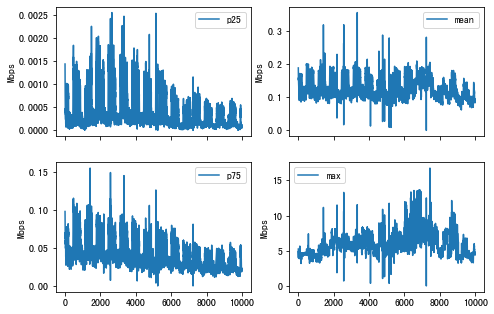

In [35]:
fig,ax=plt.subplots(2,2,sharex='col')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)

for idx, data in enumerate(data_distribs):
#     ax[idx//2,idx%2].plot(range(5100,5200),data[5100:5200])
    ax[idx//2,idx%2].plot(range(len(data)),data)
    ax[idx//2,idx%2].set_ylabel("Mbps")
    ax[idx//2,idx%2].legend(distribs_names[idx])

#### 寻找合适的缩放比

In [527]:
pf = pd.DataFrame(np.loadtxt("/home/guifei/projects/g8_hesy/LP_Final/LP_output/pr_GEA_seer_trueTM3999.txt"))
des_pf = pf.describe()

In [ ]:
pf_ = pf*40
des_pf_ = pf_.describe()
# print(des_pf_.iloc[:,0])
des_pf_

Text(0.5, 1.0, 'cdf')

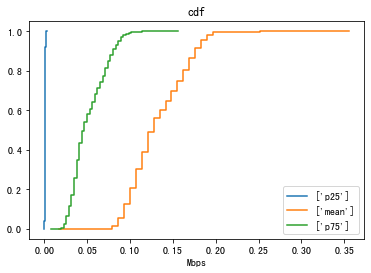

In [568]:
import statsmodels.api as sm
cdf_data=[]

# for idx, data in enumerate(data_distribs):
for idx, data in enumerate(data_distribs[:-1]):  # 不要包含max ，差太多了
    ecdf = sm.distributions.ECDF(data)
    #等差数列，用于绘制X轴数据
    x = np.linspace(min(data), max(data))
    # x轴数据上值对应的累计密度概率
    y = ecdf(x)
#     cdf_data.append({"x":x,"y":y})
#     plt.step(data["x"],data["y"])
    plt.step(x,y)

plt.legend(distribs_names)

plt.xlabel("Mbps")
plt.title("cdf")

### 处理(生成flows)

数据文件的地址：(g14)

/home/hesy/pro/g8/genflow/TmDataIn15min.txt

/home/hesy/pro/g8/genflow/codes-trueTM/tencent_cdf.txt

<div class="alert alert-block alert-info">
<b>查看腾讯数据cdf的情况</b> 
</div>

In [4]:
cdfData_ori= np.loadtxt("/home/hesy/projects/genflow/codes-trueTM/tencent_cdf.txt")

In [5]:
tmp = cdfData_ori[:-1]
cdfData = np.append(tmp,[[1e+5, 1]],axis =0)

In [ ]:
cdfData,tmp

In [ ]:
# nums,pdf = cdfData_ori[:,0],cdfData_ori[:,-1]
nums,pdf = cdfData[:,0],cdfData[:,-1]
plt.plot(nums,pdf)
plt.xlabel("size of a flow(bytes)")
plt.ylabel("pdf(%)")
plt.title("distribution of flow size at tencent gateway")

---

<div class="alert alert-block alert-info">
<b>人工放缩比</b>
<br> 这两个参数其实最后会影响flows[fromNode][toNode]的流的数量 和 分布(scale调整数量，scale_调整分布)
</div>

#### 人工缩放比(hypermeters)

In [119]:
scale = 20 # hesy:这个缩放比不是真实数据的得到的，是我们自己搞的，为了让流量合理 （直接作用在TM流量上）
# scale_ =1000 # hesy: 人工对cdf数据的调整
scale_ =1 # hesy: 人工对cdf数据的调整

In [120]:
from bisect import bisect
def chazhi(nums,distributionOfFlows,poss=None): # -> 根据cdf采样得到的随机生成的流大小
#     global scale_ 
    poss = np.random.random() if not poss else poss
    index,poss2num = 0,0
    while index<1:  # 其实一般来讲index不会<1的
        index = bisect(distributionOfFlows, poss)
    # 线性插值  (end_y-p_y)/(end_y-begin_y) = (end_x-p_x)/(end_x-begin_x)
    poss2num = nums[index] - (distributionOfFlows[index] - poss)/(
    distributionOfFlows[index] - distributionOfFlows[index-1])*(nums[index]-nums[index-1])
#     if int(poss2num)==0:
#         print(f"poss2num is 0 when index is {index} and poss is {poss}")
    return poss2num/scale_   # 其实不一定要整数，出来的太规整了吧...

def generateFlows(nums,distributionOfFlows,flowSize):
    sumFlow = 0
    flows = []
    while sumFlow<flowSize:
        tmp = chazhi(nums,distributionOfFlows)
        if tmp:  # 因为小数的原因...有时候会出现0
            sumFlow+=tmp
            flows.append(tmp)
    if flowSize:
        sumFlow-=flows.pop()
        flows.append(flowSize-sumFlow)
    return flows

<div class="alert alert-block alert-info">
<b>取4500-4600</b> 
</div>

#### 529->506

In [121]:
# Mbps为单位，还未缩放过的
diags_list = [ i*23+i for i in range(23) ]
tms_506 = tms.drop(diags_list,axis=1)
tms_506.columns=range(23*22)  # drop了还得重新让columns升序

In [122]:
tm4500_4600 = tms_506.iloc[4500:4600,:]*30*scale/100 # len(tm1) = 506 = 23*23 # 因为ns3里面带宽缩小了100倍，所以这里也除以100。 # 30代表30s
len_tms = len(tm4500_4600)
tm4500_4600.index = range(len_tms)
# 注意，这里别搞成小数
#这里的单位是MBps，但是我没有*8，相当于整体缩小了8倍

In [ ]:
tm4500_4600

In [123]:
flows_ =[ [] for _ in range(len_tms)] 
# flows = np.array([[[] for _ in range(22)] for _ in range(23)])  # 23*22的list
flows = [[[0 for _ in range(22)] for __ in range(23)] for ___ in range(len_tms)] # len(tm)*23*22的list
flowNum =[[[ 0 for _ in range(22)] for __ in range(23)] for ___ in range(len_tms)]
# for fromNode in range(2):
#     for toNode in range(2)
import ipdb

try:
    for tmIdx in range(len_tms):
        for fromNode in range(23):
            for toNode in range(22):

                flows[tmIdx][fromNode][toNode]=generateFlows(nums,pdf,tm4500_4600.iloc[tmIdx,fromNode*22+toNode]*(10**6)/8) # Mbps --> Bps
                flows_[tmIdx].extend(flows[tmIdx][fromNode][toNode])
                flowNum[tmIdx][fromNode][toNode] = len(flows[tmIdx][fromNode][toNode])
                
except:
    print(f"tmIdx,fromNode,toNode is {tmIdx},{fromNode},{toNode} ")
    print(f"fromNode*22+toNode is {fromNode*22+toNode} ")    

flows : list of 1000 * 23 * 22 , each is also a list
flows_: list of 1000 个list , which 

In [409]:
np.save("flows23*22.npy",flows)
np.save("flowNum23*22.npy",flowNum)

<div class="alert alert-block alert-info">
<b>如果每条流的CBR是1/10的2488 --> 2le6 30s最多让你发，所以这个flows里面的数值最大是60(le6是本来就要缩放的大小)</b> 
<br> 现在check下到底是多少以决定要缩放多少
</div>

scale为1的时候，mean是le3,max是le5。 <br>
所以将scale设置为1000试试（再缩小1000倍）。

进一步的，如果采用On-Off的形式，ratio为10的情况下，发送时间(x)和关闭时间(y)要满足的大小关系是(y=9x),所以就让发送时间为10s的话，开的时间不能超过1s,which means30s内实际能发的是2(le6)*3而不是2(le6)*30 --> 所以流最好别超过6le6

#### 生成流的查看 -- 最初TM1的生成情况 作为基准(肯定正确的)

<div class="alert alert-block alert-info">
<b>生成的单位都是B了</b> 
</div>

##### 流的大小分布情况查看

In [ ]:
print(np.percentile(flows_, 50))
print(np.percentile(flows_, 95))
max(flows_)

In [ ]:
原结果是148，400+ 和 9988

In [ ]:
import statsmodels.api as sm
data = flows_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

大流不多

??? 50% 是100多B是不是有点小了...

##### session对之间生成的流的数量分布情况查看

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [677]:
flowNums_= np.array(flowNum).reshape((-1,))
print(np.percentile(flowNum, 50))
print(np.percentile(flowNum, 95))
max(flowNums_)  

39.0
2035.0


8092

Text(0, 0.5, 'cdf')

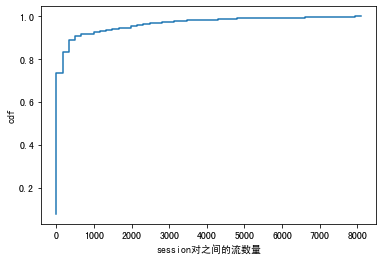

In [678]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [680]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,"[126.69682697064766, 25.669692420675403, 193.9...","[237.80086091556808, 85.56726766152741, 528.25...","[86.82945920969266, 1453.4972779629202, 163.30...","[1427.3973922406128, 164.6289259844003, 827.12...","[1794.0361708661521, 286.50157744215664, 1800....","[1517.6325847563764, 102.06835351385044, 39.60...","[12.32730094452917, 46.899507162123875, 1884.1...","[188.31401908674528, 79.90098558291794, 1463.7...",[],"[155.05308627976237, 7.844752232966542, 83.810...",...,"[396.33720452271064, 705.0367555631138, 407.69...","[169.3911026391445, 705.0370877155987, 536.346...","[2718.6007250864172, 167.86645397749885, 89.83...","[1773.7385478889398, 119.01063865378647, 10.14...","[670.9294680702804, 71.36515855777205, 190.696...","[252.2466344511156, 125.60334838045, 72.336039...","[1865.8524854380457, 1832.2368703521186, 2963....","[47.135603740561436, 86.05362645644735, 260.30...","[85.05605851602053, 685.7592881511525, 442.907...","[7.856983254085563, 1544.0720552959551, 102.22..."
1,"[33.594686780282636, 70.11461723867923, 1197.1...","[73.24887387496992, 19.857345621622727, 46.171...","[49.46736005557241, 64.5214396261654, 165.3491...","[217.78188529157154, 68.93076556275804, 59.291...","[143.60055124229882, 53.34909730524162, 513.45...","[9.499209481655939, 88.9037347603602, 73.17495...","[150.8049283314835, 101.48248153206865, 1196.4...","[3217.332701804651, 89.27867147150374, 35.4663...",[],"[526.9115572439052, 900.8851205351777, 39.7594...",...,"[280.973577952284, 147.54482797158406, 106.383...","[113.00483855196228, 7646.60947391128, 2463.21...","[25.763660452057216, 341.47106576504945, 244.3...","[1165.4782060790876, 143.84816188914024, 641.6...","[191.6273472627413, 207.33671178194524, 1316.7...","[1723.8243522860987, 44.628448101614914, 172.8...","[471.5531755115195, 66.2850307749189, 936.7512...","[207.60226276585888, 1231.082054012663, 13.656...","[154.74971197618885, 102.2457379038174, 84.166...","[99.44144783560246, 110.57321883106414]"
2,"[221.41600055595234, 128.9152807485386, 400.18...","[88.80622242232837, 654.0561392391689, 1640.04...","[1327.362356861633, 1501.8196086494652, 112.11...","[198.2424502155271, 106.40882952503664, 1309.5...","[215.5347337672073, 157.67993289945946]","[29.211033071093645, 172.32217381235213, 115.1...","[743.8664195443505, 202.9586153335366, 261.857...","[24.04220499120374, 906.9756329341537, 115.269...",[],"[1071.656980239948, 993.336028156381, 67.25558...",...,"[42.24418027939209, 1084.3472068374595, 14.249...",[886.3999999999999],"[1887.8957906190492, 92.86763284437504, 131.86...","[89.26388862547256, 1802.776461542525, 1825.33...","[88.07733635695165, 1603.0297836034142, 105.88...","[1579.895088014771, 171.92412108030726, 975.43...","[85.77671294373528, 86.87521245538284, 37.5221...","[80.53102555862596, 127.43255248081174, 37.015...","[185.40304595441228, 93.48112547702326, 162.44...","[166.77610054003205, 1108.2185775623864, 88.41..."
3,"[42.73879928180706, 165.54630759575883, 5.9207...","[1104.8509265124335, 209.98470300161844, 4908....","[88.55049853671879, 146.86170614673858, 1208.9...","[84.12132343970575, 74.3476447160355, 85.22874...",[1002.6666666666669],"[75.89350695892703, 1336.184534589836, 81.4379...","[89.371007079636, 54.438522388386914, 58.12539...","[723.8792544165129, 1600.086411685505, 241.492...",[],"[444.2819141917952, 64.81873037991048, 79.7487...",...,"[3.9985733515007382, 334.64908415320264, 17.70...","[104.90124693058802, 6.8920497022587455, 62.33...","[63.656555456387785, 803.56274571982, 72.44322...","[251.2278379620612, 423.2500928886162, 75.3323...","[11.474263602177885, 85.94917190946533, 115.14...","[1496.5382681111362, 1443.081287010776, 5090.1...","[241.91975615141274, 216.77793275830578, 739.3...","[482.6690278390985, 4.197993479760115, 744.791...","[1414.5503570004907, 504.2130236172653, 843.04...",[47.88133333333334]
4,"[974.9086265508461, 89.80497952412172, 551.878...","[88.0910997510801

#### TM 4503 查看 -- check

##### 流的大小分布情况查看

In [124]:
print(np.percentile(flows_[3], 50))
print(np.percentile(flows_[3], 95))
max(flows_[3])

146.66268262319517
2267.421713466332


99812.61056070848

跟上面的差不多哈，感觉没有造错

Text(0, 0.5, 'cdf')

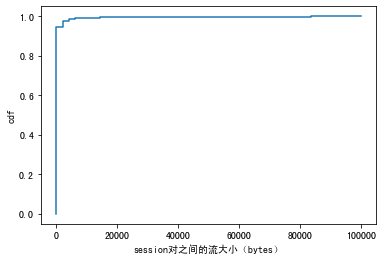

In [125]:
import statsmodels.api as sm
data = flows_[3]
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

大流不多

??? 50% 是100多B是不是有点小了...

##### session对之间生成的流的数量分布情况查看

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [126]:
flowNums_= np.array(flowNum[3]).reshape((-1,))
print(np.percentile(flowNums_, 50))
print(np.percentile(flowNums_, 95))
max(flowNums_)  

8.0
425.0


3726

Text(0, 0.5, 'cdf')

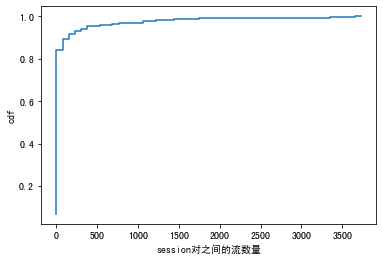

In [127]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [107]:
len(pd.DataFrame(flows).iloc[2,1][3])

29

In [ ]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

##### 将流和间隔时间写入文件夹中

把上述的东西 记录到文件夹中，路径为：<br>
/home/hesy/projects/genflow/data-onoff/lam_1/TMx/tmy/sizea_b (g2) <br>
/home/hesy/pro/g8/genflow/data-onoff/lam_1/TM1/tm1 (g14)

In [128]:
df_flow = pd.DataFrame(flows)
print(df_flow.shape)   # tmNUm * 23 * 22 * sessionFlowNum
print(len(df_flow[1][3]))  # 22
print(len(df_flow[1][3][3]))  # len of flowNum of this session

(100, 23)
22
25


In [129]:
df_flowNum = pd.DataFrame(flowNum)
print(df_flow.shape)   # tmNUm * 23 * 22 * sessionFlowNum
print(len(df_flow.iloc[1,3]))  # 22
print(len(df_flow.iloc[1,3][3]))  # len of flowNum of this session

(100, 23)
22
26


In [ ]:
df_flowNum.head()

In [110]:
len(df_flow.iloc[1,3])

22

In [ ]:
df_flow[23][0]

In [ ]:
df_flow.iloc[23,0]

In [130]:
TMbegin = 4500
TMnum = 100
prefix = f"/home/hesy/projects/genflow/data-newTrue-diff-lam/lam_{scale}/" # "

In [131]:
import random
def saveFlows( TMidx,TMbegin, df_flow,df_flowNum):
    try:
        for fromNode in range(23):
            toNode = -1
            for toIdx in range(23):
                if fromNode == toIdx :
                    continue
                toNode+=1 # 这个只是个下标志,从0-21，只有toIdx才代表Node的index(0-22)
                with open(prefix+f"TM{TMidx+TMbegin}/tm1/size{fromNode+1}_{toIdx+1}","w") as sizeFile:
                    with open(prefix+f"TM{TMidx+TMbegin}/tm1/interval{fromNode+1}_{toIdx+1}","w") as intervalFile:
                        for flow in df_flow.iloc[TMidx,fromNode][toNode]:
                            print(int(flow),file = sizeFile)
                            print(random.expovariate(1.0*df_flowNum.iloc[TMidx,fromNode][toNode]/30),file = intervalFile)  # 平均速率是 30/flowNUm 再求个倒数
    except :
        print(f"TMidx,fromNode,toNode is {TMidx},{fromNode},{toNode}")

<div class="alert alert-block alert-warning">
<b> 应该写成多进程 </b>
<br>
python的try怎么写更规范
</div>

In [132]:
for TMidx in range(TMnum):
    saveFlows(TMidx,TMbegin,df_flow,df_flowNum)

---

## TM数据(Abilene)

### 分析

In [3]:
tms_abi = pd.read_csv("/home/hesy/projects/genflow/Abi_6k_inMpbs.csv",header =None)*8/(3*10**6)# --> changes ori to Mbps
des_abi = tms_abi.transpose().describe()
print(f"des_abi.shape is {des_abi.shape}")
print(f"tms_abi.shape is {tms_abi.shape}")
tms_abi.head()

des_abi.shape is (8, 6000)
tms_abi.shape is (6000, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,7.111111e-08,0.000001,0.000004,8.952747e-07,0.000001,0.000001,9.735396e-07,2.180985e-06,0.000001,1.993081e-06,...,0.000177,0.000096,0.000041,0.000167,0.000087,0.000244,0.000356,0.000005,0.000079,0.000500
1,7.111111e-08,0.000001,0.000002,3.955911e-07,0.000001,0.000005,1.072384e-06,2.908928e-06,0.000002,0.000000e+00,...,0.000166,0.000091,0.000042,0.000152,0.000066,0.000268,0.000366,0.000012,0.000082,0.000509
2,1.422222e-07,0.000001,0.000003,7.363627e-07,0.000001,0.000005,1.085739e-06,1.076437e-06,0.000002,3.194738e-07,...,0.000187,0.000080,0.000053,0.000156,0.000051,0.000246,0.000410,0.000014,0.000107,0.000583
3,1.793991e-07,0.000001,0.000004,3.233849e-07,0.000001,0.000002,1.351324e-06,3.795413e-07,0.000002,4.504747e-07,...,0.000199,0.000120,0.000043,0.000135,0.000050,0.000261,0.000425,0.000012,0.000102,0.000708
4,7.111111e-08,0.000002,0.000004,4.425031e-07,0.000001,0.000001,8.086827e-07,6.876729e-07,0.000002,1.967289e-07,...,0.000186,0.000119,0.000049,0.000136,0.000050,0.000249,0.000404,0.000009,0.000116,0.000561


In [4]:
p25,p75 = des_abi.loc["25%",:].values,des_abi.loc["75%",:].values
mean_ = des_abi.loc["mean",:].values
max_ = des_abi.loc["max",:].values
data_distribs =[p25,mean_,p75,max_]
distribs_names = [["p25"],["mean"],["p75"],["max"]]

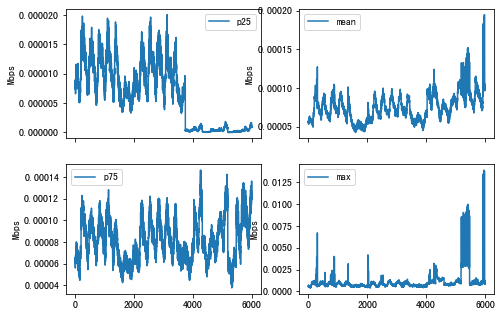

In [5]:
fig,ax=plt.subplots(2,2,sharex='col')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)

for idx, data in enumerate(data_distribs):
#     ax[idx//2,idx%2].plot(range(0,5000),data[0:5000])
    ax[idx//2,idx%2].plot(range(len(data)),data)
    ax[idx//2,idx%2].set_ylabel("Mbps")
    ax[idx//2,idx%2].legend(distribs_names[idx])

#### 寻找合适的缩放比

In [161]:
pf = pd.DataFrame(np.loadtxt("/home/guifei/projects/g8_hesy/LP_Final/LP_output/Abi-se-huge.txt"))*8/3/10**3
# des_pf = pf.describe()

In [1]:
plt.plot(range(len(pf[:5000])),pf[:5000]*5)

NameError: name 'plt' is not defined

Text(0, 0.5, 'MLU(%)')

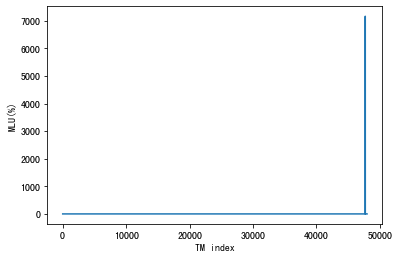

In [181]:
plt.plot(range(len(pf)),pf)
plt.xlabel("TM index")
plt.ylabel("MLU(%)")

In [ ]:
pf_ = pf*40
des_pf_ = pf_.describe()
# print(des_pf_.iloc[:,0])
des_pf_

Text(0.5, 1.0, 'cdf')

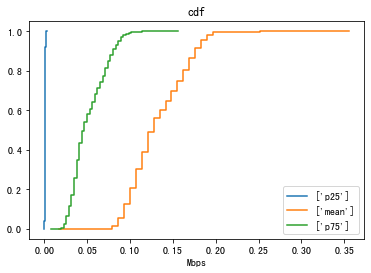

In [568]:
import statsmodels.api as sm
cdf_data=[]

# for idx, data in enumerate(data_distribs):
for idx, data in enumerate(data_distribs[:-1]):  # 不要包含max ，差太多了
    ecdf = sm.distributions.ECDF(data)
    #等差数列，用于绘制X轴数据
    x = np.linspace(min(data), max(data))
    # x轴数据上值对应的累计密度概率
    y = ecdf(x)
#     cdf_data.append({"x":x,"y":y})
#     plt.step(data["x"],data["y"])
    plt.step(x,y)

plt.legend(distribs_names)

plt.xlabel("Mbps")
plt.title("cdf")

### 处理(生成flows)

数据文件的地址：(g14)

/home/hesy/pro/g8/genflow/TmDataIn15min.txt

/home/hesy/pro/g8/genflow/codes-trueTM/tencent_cdf.txt

<div class="alert alert-block alert-info">
<b>查看腾讯数据cdf的情况</b> 
</div>

In [4]:
cdfData_ori= np.loadtxt("/home/hesy/projects/genflow/codes-trueTM/tencent_cdf.txt")

In [5]:
tmp = cdfData_ori[:-1]
cdfData = np.append(tmp,[[1e+5, 1]],axis =0)

In [ ]:
cdfData,tmp

In [ ]:
# nums,pdf = cdfData_ori[:,0],cdfData_ori[:,-1]
nums,pdf = cdfData[:,0],cdfData[:,-1]
plt.plot(nums,pdf)
plt.xlabel("size of a flow(bytes)")
plt.ylabel("pdf(%)")
plt.title("distribution of flow size at tencent gateway")

---

<div class="alert alert-block alert-info">
<b>人工放缩比</b>
<br> 这两个参数其实最后会影响flows[fromNode][toNode]的流的数量 和 分布(scale调整数量，scale_调整分布)
</div>

#### 人工缩放比(hypermeters)

In [119]:
scale = 20 # hesy:这个缩放比不是真实数据的得到的，是我们自己搞的，为了让流量合理 （直接作用在TM流量上）
# scale_ =1000 # hesy: 人工对cdf数据的调整
scale_ =1 # hesy: 人工对cdf数据的调整

In [120]:
from bisect import bisect
def chazhi(nums,distributionOfFlows,poss=None): # -> 根据cdf采样得到的随机生成的流大小
#     global scale_ 
    poss = np.random.random() if not poss else poss
    index,poss2num = 0,0
    while index<1:  # 其实一般来讲index不会<1的
        index = bisect(distributionOfFlows, poss)
    # 线性插值  (end_y-p_y)/(end_y-begin_y) = (end_x-p_x)/(end_x-begin_x)
    poss2num = nums[index] - (distributionOfFlows[index] - poss)/(
    distributionOfFlows[index] - distributionOfFlows[index-1])*(nums[index]-nums[index-1])
#     if int(poss2num)==0:
#         print(f"poss2num is 0 when index is {index} and poss is {poss}")
    return poss2num/scale_   # 其实不一定要整数，出来的太规整了吧...

def generateFlows(nums,distributionOfFlows,flowSize):
    sumFlow = 0
    flows = []
    while sumFlow<flowSize:
        tmp = chazhi(nums,distributionOfFlows)
        if tmp:  # 因为小数的原因...有时候会出现0
            sumFlow+=tmp
            flows.append(tmp)
    if flowSize:
        sumFlow-=flows.pop()
        flows.append(flowSize-sumFlow)
    return flows

<div class="alert alert-block alert-info">
<b>取4500-4600</b> 
</div>

#### 529->506

In [121]:
# Mbps为单位，还未缩放过的
diags_list = [ i*23+i for i in range(23) ]
tms_506 = tms.drop(diags_list,axis=1)
tms_506.columns=range(23*22)  # drop了还得重新让columns升序

In [122]:
tm4500_4600 = tms_506.iloc[4500:4600,:]*30*scale/100 # len(tm1) = 506 = 23*23 # 因为ns3里面带宽缩小了100倍，所以这里也除以100。 # 30代表30s
len_tms = len(tm4500_4600)
tm4500_4600.index = range(len_tms)
# 注意，这里别搞成小数
#这里的单位是MBps，但是我没有*8，相当于整体缩小了8倍

In [ ]:
tm4500_4600

In [123]:
flows_ =[ [] for _ in range(len_tms)] 
# flows = np.array([[[] for _ in range(22)] for _ in range(23)])  # 23*22的list
flows = [[[0 for _ in range(22)] for __ in range(23)] for ___ in range(len_tms)] # len(tm)*23*22的list
flowNum =[[[ 0 for _ in range(22)] for __ in range(23)] for ___ in range(len_tms)]
# for fromNode in range(2):
#     for toNode in range(2)
import ipdb

try:
    for tmIdx in range(len_tms):
        for fromNode in range(23):
            for toNode in range(22):

                flows[tmIdx][fromNode][toNode]=generateFlows(nums,pdf,tm4500_4600.iloc[tmIdx,fromNode*22+toNode]*(10**6)/8) # Mbps --> Bps
                flows_[tmIdx].extend(flows[tmIdx][fromNode][toNode])
                flowNum[tmIdx][fromNode][toNode] = len(flows[tmIdx][fromNode][toNode])
                
except:
    print(f"tmIdx,fromNode,toNode is {tmIdx},{fromNode},{toNode} ")
    print(f"fromNode*22+toNode is {fromNode*22+toNode} ")    

flows : list of 1000 * 23 * 22 , each is also a list
flows_: list of 1000 个list , which 

In [409]:
np.save("flows23*22.npy",flows)
np.save("flowNum23*22.npy",flowNum)

<div class="alert alert-block alert-info">
<b>如果每条流的CBR是1/10的2488 --> 2le6 30s最多让你发，所以这个flows里面的数值最大是60(le6是本来就要缩放的大小)</b> 
<br> 现在check下到底是多少以决定要缩放多少
</div>

scale为1的时候，mean是le3,max是le5。 <br>
所以将scale设置为1000试试（再缩小1000倍）。

进一步的，如果采用On-Off的形式，ratio为10的情况下，发送时间(x)和关闭时间(y)要满足的大小关系是(y=9x),所以就让发送时间为10s的话，开的时间不能超过1s,which means30s内实际能发的是2(le6)*3而不是2(le6)*30 --> 所以流最好别超过6le6

### 生成流的查看 -- 最初TM1的生成情况 作为基准(肯定正确的)

<div class="alert alert-block alert-info">
<b>生成的单位都是B了</b> 
</div>

#### 流的大小分布情况查看

In [ ]:
print(np.percentile(flows_, 50))
print(np.percentile(flows_, 95))
max(flows_)

In [ ]:
原结果是148，400+ 和 9988

In [ ]:
import statsmodels.api as sm
data = flows_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

大流不多

??? 50% 是100多B是不是有点小了...

#### session对之间生成的流的数量分布情况查看

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [677]:
flowNums_= np.array(flowNum).reshape((-1,))
print(np.percentile(flowNum, 50))
print(np.percentile(flowNum, 95))
max(flowNums_)  

39.0
2035.0


8092

Text(0, 0.5, 'cdf')

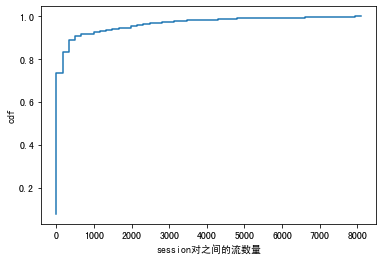

In [678]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [680]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,"[126.69682697064766, 25.669692420675403, 193.9...","[237.80086091556808, 85.56726766152741, 528.25...","[86.82945920969266, 1453.4972779629202, 163.30...","[1427.3973922406128, 164.6289259844003, 827.12...","[1794.0361708661521, 286.50157744215664, 1800....","[1517.6325847563764, 102.06835351385044, 39.60...","[12.32730094452917, 46.899507162123875, 1884.1...","[188.31401908674528, 79.90098558291794, 1463.7...",[],"[155.05308627976237, 7.844752232966542, 83.810...",...,"[396.33720452271064, 705.0367555631138, 407.69...","[169.3911026391445, 705.0370877155987, 536.346...","[2718.6007250864172, 167.86645397749885, 89.83...","[1773.7385478889398, 119.01063865378647, 10.14...","[670.9294680702804, 71.36515855777205, 190.696...","[252.2466344511156, 125.60334838045, 72.336039...","[1865.8524854380457, 1832.2368703521186, 2963....","[47.135603740561436, 86.05362645644735, 260.30...","[85.05605851602053, 685.7592881511525, 442.907...","[7.856983254085563, 1544.0720552959551, 102.22..."
1,"[33.594686780282636, 70.11461723867923, 1197.1...","[73.24887387496992, 19.857345621622727, 46.171...","[49.46736005557241, 64.5214396261654, 165.3491...","[217.78188529157154, 68.93076556275804, 59.291...","[143.60055124229882, 53.34909730524162, 513.45...","[9.499209481655939, 88.9037347603602, 73.17495...","[150.8049283314835, 101.48248153206865, 1196.4...","[3217.332701804651, 89.27867147150374, 35.4663...",[],"[526.9115572439052, 900.8851205351777, 39.7594...",...,"[280.973577952284, 147.54482797158406, 106.383...","[113.00483855196228, 7646.60947391128, 2463.21...","[25.763660452057216, 341.47106576504945, 244.3...","[1165.4782060790876, 143.84816188914024, 641.6...","[191.6273472627413, 207.33671178194524, 1316.7...","[1723.8243522860987, 44.628448101614914, 172.8...","[471.5531755115195, 66.2850307749189, 936.7512...","[207.60226276585888, 1231.082054012663, 13.656...","[154.74971197618885, 102.2457379038174, 84.166...","[99.44144783560246, 110.57321883106414]"
2,"[221.41600055595234, 128.9152807485386, 400.18...","[88.80622242232837, 654.0561392391689, 1640.04...","[1327.362356861633, 1501.8196086494652, 112.11...","[198.2424502155271, 106.40882952503664, 1309.5...","[215.5347337672073, 157.67993289945946]","[29.211033071093645, 172.32217381235213, 115.1...","[743.8664195443505, 202.9586153335366, 261.857...","[24.04220499120374, 906.9756329341537, 115.269...",[],"[1071.656980239948, 993.336028156381, 67.25558...",...,"[42.24418027939209, 1084.3472068374595, 14.249...",[886.3999999999999],"[1887.8957906190492, 92.86763284437504, 131.86...","[89.26388862547256, 1802.776461542525, 1825.33...","[88.07733635695165, 1603.0297836034142, 105.88...","[1579.895088014771, 171.92412108030726, 975.43...","[85.77671294373528, 86.87521245538284, 37.5221...","[80.53102555862596, 127.43255248081174, 37.015...","[185.40304595441228, 93.48112547702326, 162.44...","[166.77610054003205, 1108.2185775623864, 88.41..."
3,"[42.73879928180706, 165.54630759575883, 5.9207...","[1104.8509265124335, 209.98470300161844, 4908....","[88.55049853671879, 146.86170614673858, 1208.9...","[84.12132343970575, 74.3476447160355, 85.22874...",[1002.6666666666669],"[75.89350695892703, 1336.184534589836, 81.4379...","[89.371007079636, 54.438522388386914, 58.12539...","[723.8792544165129, 1600.086411685505, 241.492...",[],"[444.2819141917952, 64.81873037991048, 79.7487...",...,"[3.9985733515007382, 334.64908415320264, 17.70...","[104.90124693058802, 6.8920497022587455, 62.33...","[63.656555456387785, 803.56274571982, 72.44322...","[251.2278379620612, 423.2500928886162, 75.3323...","[11.474263602177885, 85.94917190946533, 115.14...","[1496.5382681111362, 1443.081287010776, 5090.1...","[241.91975615141274, 216.77793275830578, 739.3...","[482.6690278390985, 4.197993479760115, 744.791...","[1414.5503570004907, 504.2130236172653, 843.04...",[47.88133333333334]
4,"[974.9086265508461, 89.80497952412172, 551.878...","[88.0910997510801

### TM 4503 查看 -- check

#### 流的大小分布情况查看

In [124]:
print(np.percentile(flows_[3], 50))
print(np.percentile(flows_[3], 95))
max(flows_[3])

146.66268262319517
2267.421713466332


99812.61056070848

跟上面的差不多哈，感觉没有造错

Text(0, 0.5, 'cdf')

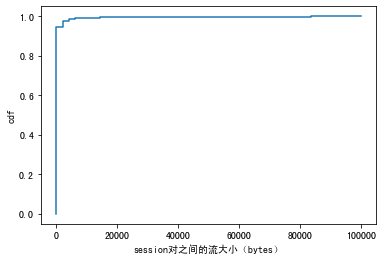

In [125]:
import statsmodels.api as sm
data = flows_[3]
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流大小（bytes）")
plt.ylabel("cdf")

大流不多

??? 50% 是100多B是不是有点小了...

#### session对之间生成的流的数量分布情况查看

<div class="alert alert-block alert-info">
<b>查看下session * session的flows的num数量大概是多少</b> 
</div>

In [126]:
flowNums_= np.array(flowNum[3]).reshape((-1,))
print(np.percentile(flowNums_, 50))
print(np.percentile(flowNums_, 95))
max(flowNums_)  

8.0
425.0


3726

Text(0, 0.5, 'cdf')

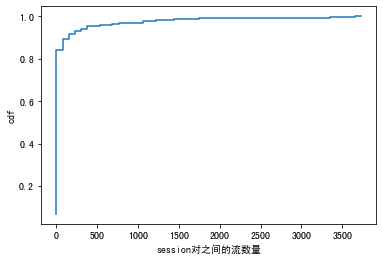

In [127]:
import statsmodels.api as sm
data = flowNums_
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
plt.step(x,y)
plt.xlabel("session对之间的流数量")
plt.ylabel("cdf")

1s内流的数量不超过300条 ，变成30s之后就是不超过le4条

<div class="alert alert-block alert-info">
<b>这个单位就全都是bytes了</b> , 上面生成流的过程中全部转为bytes了
</div>

In [107]:
len(pd.DataFrame(flows).iloc[2,1][3])

29

In [ ]:
flows_ = pd.DataFrame(flows)
# flows_.iloc[0,3]
flows_.head()

#### 将流和间隔时间写入文件夹中

把上述的东西 记录到文件夹中，路径为：<br>
/home/hesy/projects/genflow/data-onoff/lam_1/TMx/tmy/sizea_b (g2) <br>
/home/hesy/pro/g8/genflow/data-onoff/lam_1/TM1/tm1 (g14)

In [128]:
df_flow = pd.DataFrame(flows)
print(df_flow.shape)   # tmNUm * 23 * 22 * sessionFlowNum
print(len(df_flow[1][3]))  # 22
print(len(df_flow[1][3][3]))  # len of flowNum of this session

(100, 23)
22
25


In [129]:
df_flowNum = pd.DataFrame(flowNum)
print(df_flow.shape)   # tmNUm * 23 * 22 * sessionFlowNum
print(len(df_flow.iloc[1,3]))  # 22
print(len(df_flow.iloc[1,3][3]))  # len of flowNum of this session

(100, 23)
22
26


In [ ]:
df_flowNum.head()

In [110]:
len(df_flow.iloc[1,3])

22

In [ ]:
df_flow[23][0]

In [ ]:
df_flow.iloc[23,0]

In [130]:
TMbegin = 4500
TMnum = 100
prefix = f"/home/hesy/projects/genflow/data-newTrue-diff-lam/lam_{scale}/" # "

In [131]:
import random
def saveFlows( TMidx,TMbegin, df_flow,df_flowNum):
    try:
        for fromNode in range(23):
            toNode = -1
            for toIdx in range(23):
                if fromNode == toIdx :
                    continue
                toNode+=1 # 这个只是个下标志,从0-21，只有toIdx才代表Node的index(0-22)
                with open(prefix+f"TM{TMidx+TMbegin}/tm1/size{fromNode+1}_{toIdx+1}","w") as sizeFile:
                    with open(prefix+f"TM{TMidx+TMbegin}/tm1/interval{fromNode+1}_{toIdx+1}","w") as intervalFile:
                        for flow in df_flow.iloc[TMidx,fromNode][toNode]:
                            print(int(flow),file = sizeFile)
                            print(random.expovariate(1.0*df_flowNum.iloc[TMidx,fromNode][toNode]/30),file = intervalFile)  # 平均速率是 30/flowNUm 再求个倒数
    except :
        print(f"TMidx,fromNode,toNode is {TMidx},{fromNode},{toNode}")

<div class="alert alert-block alert-warning">
<b> 应该写成多进程 </b>
<br>
python的try怎么写更规范
</div>

In [132]:
for TMidx in range(TMnum):
    saveFlows(TMidx,TMbegin,df_flow,df_flowNum)

---

# 根据TM构造流量